In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this allows plots to appear directly in notebook
%matplotlib inline

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

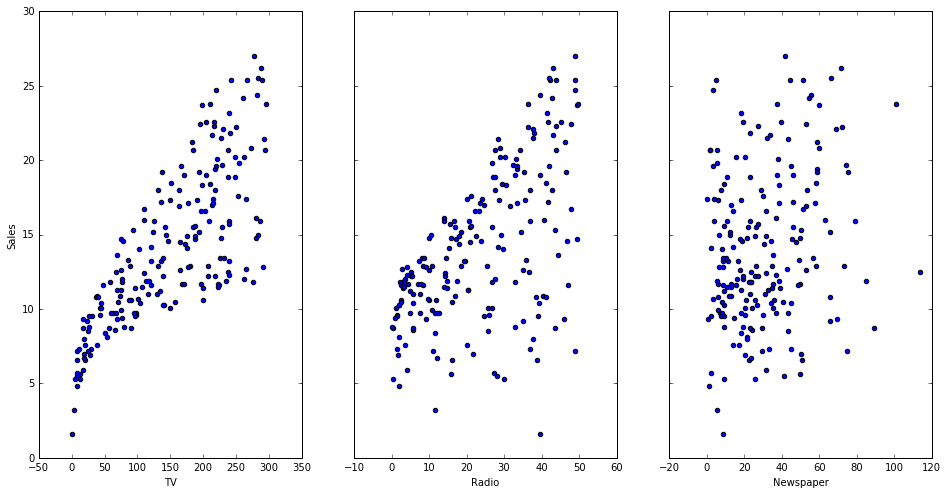

In [13]:
# visualize the relationship between the features and the response, using scatterplots

fig, axs = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

Is there a relationship between ads and sales?

**Simple Linear Regression** is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

In [14]:
# standard import if you're using "formula notation"
import statsmodels.formula.api as smf

In [15]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [16]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
# lets make a prediction if TV advertising would spend $50,000 
# Statsmodels formula interface expects a datarames
X_new = pd.DataFrame({'TV':[50]})


In [18]:
X_new

,TV
0,50


In [19]:
lm.predict(X_new)

array([ 9.40942557])

**Plotting the Least Squares Line**

In [20]:
# create a dataframe with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})

In [21]:
X_new

,TV
0,0.7
1,296.4


In [22]:
preds = lm.predict(X_new)

In [23]:
preds

array([  7.0658692 ,  21.12245377])

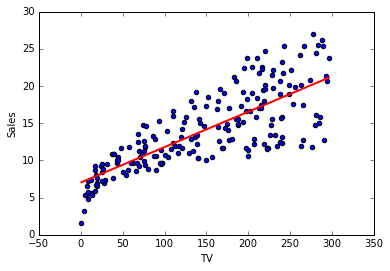

In [25]:
# first plot the observed data, then plot the least squares line
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

In [26]:
# confidence intervals
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


**null hypothesis**: there is no relationship between TV ads and sales 
**alternative hypothesis**: there is relationship between TV ads and sales . 
Typically we reject the null (and thus believe the alternative) if 95% confidence interval does not include zero. The **p-value** is the probability that the coefficient is actually zero:

In [27]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model**, or the reduction in error over the null model.

In [28]:
lm.rsquared

0.61187505085007099

**Multiple Linear Regression**

In [29]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

In [31]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Interpretation: For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 29 Mar 2016   Prob (F-statistic):           1.58e-96
Time:                        14:45:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: TV and Radio have significant **p-values** whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio, and fail to reject the null hypothesis for Newspaper. TV and Radio are both positively associated with Sales. The model has a slightly higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

Rule of thumb: only keep predictors in the model if they have small p-values; check if R-squared value goes up as you add new predictors. But keep in mind that R-squared is susceptible to overfitting, and thus there is no guarantee that high value is better.

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

A better approach to feature selection is **cross-validation**.  Cross-validation can be applied to any model, not only linear. Exampe with scikit-learn:

In [37]:
# redo above examples with scikit-learn
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# usual scikit-learn pattern; import, instantiate, fit

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lm.intercept_

2.9388893694594067

In [39]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [46]:
lm.predict([100, 25, 25])

/home/daniela/anaconda/envs/py3/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 12.20266701])

In [47]:
list(zip(feature_cols, lm.coef_))

[('TV', 0.045764645455397608),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

In [49]:
# calculate the R-squared
lm.score(X, y)

0.89721063817895208

What if one of our predictors was categorical, rather than numeric? 

In [52]:
# set a seed for reproducibility
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5 # random cathegorical data small/large

# initially set Size to small, then change roughly half to be large

data['Size'] = 'small'
data.loc[mask_large,'Size'] = 'large' # apply mask
data.head()


,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [53]:
# for scikit-learn, we need to represent all data numerically;

data['IsLarge'] = data.Size.map({'small':0, 'large':1})

In [54]:
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [55]:
# redo multiple linear regression and include IsLarge predictor

feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']

X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
list(zip(feature_cols, lm.coef_))

[('TV', 0.045719820924362775),
 ('Radio', 0.18872814313427869),
 ('Newspaper', -0.0010976794483516079),
 ('IsLarge', 0.0574238508548277)]

How do we interpret the **IsLarge** coefficient? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in sales of 57.42 widgets (compared to small market which is called the **baseline level**).

Now what if we had categorical predictors with more than two categories? Say Area: rural, suburban, urban?

In [57]:
# for reproducibilitty
np.random.seed(123456)

# assign roughly one third of observations in each category

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = (nums > 0.66)
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


Again, we have to represent Area numerically, but we cannot simply encode it as 0=rural, 1=suburban, 2=urban because it would imply an ordered relationship between suburban and urban. Instead, another dummy:

In [58]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:,1:]

In [60]:
area_dummies.head()

,Area_suburban,Area_urban
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
5,1.0,0.0


In [61]:
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0.0,0.0
2,44.5,39.3,45.1,10.4,small,0,urban,0.0,1.0
3,17.2,45.9,69.3,9.3,small,0,rural,0.0,0.0
4,151.5,41.3,58.5,18.5,small,0,urban,0.0,1.0
5,180.8,10.8,58.4,12.9,large,1,suburban,1.0,0.0


In general, if you have a categorical feature with k levels, you create k-1 dummy variables. Because the other dummies capture all the information about the feature. The "left out" will be the baseline. 

Let's include the new dummy variables in the model

In [62]:
feature_cols = feature_cols + ['Area_suburban', 'Area_urban']

In [63]:
feature_cols

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']

In [64]:
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
list(zip(feature_cols, lm.coef_))

[('TV', 0.045744010363313749),
 ('Radio', 0.18786669552525811),
 ('Newspaper', -0.0010876977267108138),
 ('IsLarge', 0.077396607497479092),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]

How do we interpret, again? Holding all other variables fixed, being a suburban area is associated with an average **decrease** in sales of 106.56 widgets (compared to baseline which is rural). Being an urban area is associated with an average of 268 widgets sales **increase**.

** All of the above is limited by the fact that it can only make good predictions if there is a linear relationship between the features and the response ** 

In [74]:
lm.predict([100,46,45, 1, 1, 0])

/home/daniela/anaconda/envs/py3/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 16.01234724])